### Problem Statement
Problem Statement- Bike-sharing system are meant to rent the bicycle and return to the different place for the bike sharing purpose in Washington DC. You are provided with rental data spanning for 2 years. You must predict the total count of bikes rented during each hour covered by the test set, using only information available prior to the rental period.

In [1]:
#import the libraries
import pandas as pd
import numpy as np

#visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#data loading
data=pd.read_csv(r"C:\Users\Praneeth\Downloads\EDA ineuron\bikes\bikes\train_bikes.csv",parse_dates=['datetime'])

In [3]:
#first five rows of the data
data.head()

datetime  season  holiday  workingday  weather  temp   atemp  \
0 2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1 2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2 2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3 2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4 2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1

In [4]:
#least five rows of the data
data.tail()

datetime  season  holiday  workingday  weather   temp  \
10881 2012-12-19 19:00:00       4        0           1        1  15.58   
10882 2012-12-19 20:00:00       4        0           1        1  14.76   
10883 2012-12-19 21:00:00       4        0           1        1  13.94   
10884 2012-12-19 22:00:00       4        0           1        1  13.94   
10885 2012-12-19 23:00:00       4        0           1        1  13.12   

        atemp  humidity  windspeed  casual  registered  count  
10881  19.695        50    26.0027       7         329    336  
10882  17.425        57    15.0013      10         231    241  
10883  15.910        61    15.0013       4         164    168  
10884  17.425        61     6.0032      12         117    129  
10885  16.665        66     8.9981       4          84     88

In [5]:
#check the info of the variable data types and any missing values present in the data 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [6]:
#Generate a descriptive statistics 
data.describe()

season       holiday    workingday       weather         temp  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.00000   
mean       2.506614      0.028569      0.680875      1.418427     20.23086   
std        1.116174      0.166599      0.466159      0.633839      7.79159   
min        1.000000      0.000000      0.000000      1.000000      0.82000   
25%        2.000000      0.000000      0.000000      1.000000     13.94000   
50%        3.000000      0.000000      1.000000      1.000000     20.50000   
75%        4.000000      0.000000      1.000000      2.000000     26.24000   
max        4.000000      1.000000      1.000000      4.000000     41.00000   

              atemp      humidity     windspeed        casual    registered  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.000000   
mean      23.655084     61.886460     12.799395     36.021955    155.552177   
std        8.474601     19.245033      8.164537     49.960477    151.039033   
min        0.760000      0.000000      0.000000      0.000000      0.000000   
25%       16.665000     47.000000      7.001500      4.000000     36.000000   
50%       24.240000     62.000000     12.998000     17.000000    118.000000   
75%       31.060000     77.000000     16.997900     49.000000    222.000000   
max       45.455000    100.000000     56.996900    367.000000    886.000000   

              count  
count  10886.000000  
mean     191.574132  
std      181.144454  
min        1.000000  
25%       42.000000  
50%      145.000000  
75%      284.000000  
max      977.000000

In [7]:
#check any correlation of the data
data.corr()

season   holiday  workingday   weather      temp     atemp  \
season      1.000000  0.029368   -0.008126  0.008879  0.258689  0.264744   
holiday     0.029368  1.000000   -0.250491 -0.007074  0.000295 -0.005215   
workingday -0.008126 -0.250491    1.000000  0.033772  0.029966  0.024660   
weather     0.008879 -0.007074    0.033772  1.000000 -0.055035 -0.055376   
temp        0.258689  0.000295    0.029966 -0.055035  1.000000  0.984948   
atemp       0.264744 -0.005215    0.024660 -0.055376  0.984948  1.000000   
humidity    0.190610  0.001929   -0.010880  0.406244 -0.064949 -0.043536   
windspeed  -0.147121  0.008409    0.013373  0.007261 -0.017852 -0.057473   
casual      0.096758  0.043799   -0.319111 -0.135918  0.467097  0.462067   
registered  0.164011 -0.020956    0.119460 -0.109340  0.318571  0.314635   
count       0.163439 -0.005393    0.011594 -0.128655  0.394454  0.389784   

            humidity  windspeed    casual  registered     count  
season      0.190610  -0.147121  0.096758    0.164011  0.163439  
holiday     0.001929   0.008409  0.043799   -0.020956 -0.005393  
workingday -0.010880   0.013373 -0.319111    0.119460  0.011594  
weather     0.406244   0.007261 -0.135918   -0.109340 -0.128655  
temp       -0.064949  -0.017852  0.467097    0.318571  0.394454  
atemp      -0.043536  -0.057473  0.462067    0.314635  0.389784  
humidity    1.000000  -0.318607 -0.348187   -0.265458 -0.317371  
windspeed  -0.318607   1.000000  0.092276    0.091052  0.101369  
casual     -0.348187   0.092276  1.000000    0.497250  0.690414  
registered -0.265458   0.091052  0.497250    1.000000  0.970948  
count      -0.317371   0.101369  0.690414    0.970948  1.000000

<Figure size 720x432 with 0 Axes>

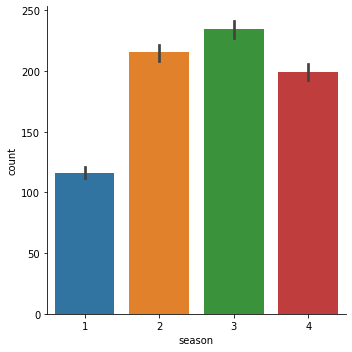

In [8]:
#let's visualize the realtion ship between the features to the independent variable callled as 'count'
#using barplot,cat plot,scatter plot,relplot
plt.figure(figsize=(10,6))
sns.catplot(x='season',y='count',kind='bar',data=data)
plt.show()

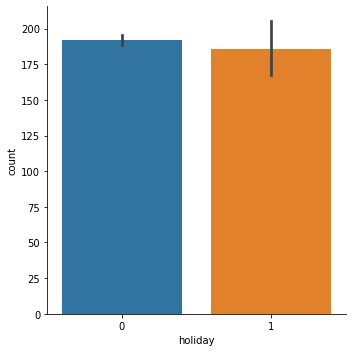

In [9]:
sns.catplot(x='holiday',y='count',kind='bar',data=data)
plt.show()

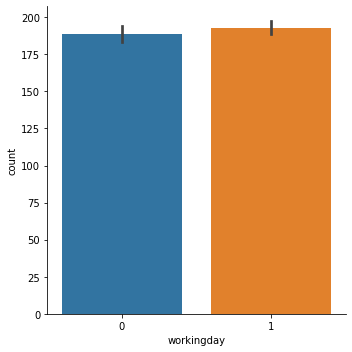

In [10]:
sns.catplot(x='workingday',y='count',kind='bar',data=data)
plt.show()

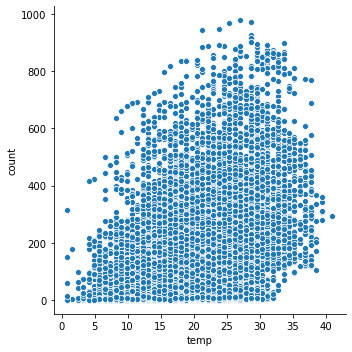

In [11]:
sns.relplot(x='temp',y='count',data=data)

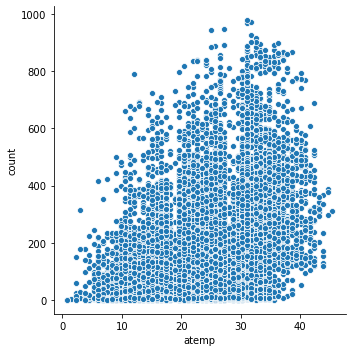

In [12]:
sns.relplot(x='atemp',y='count',data=data)

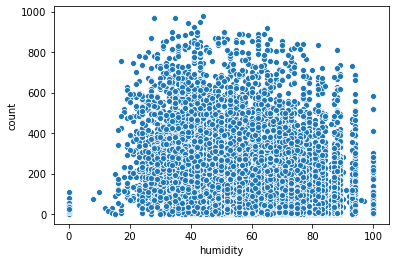

In [13]:
sns.scatterplot(x='humidity',y='count',data=data)

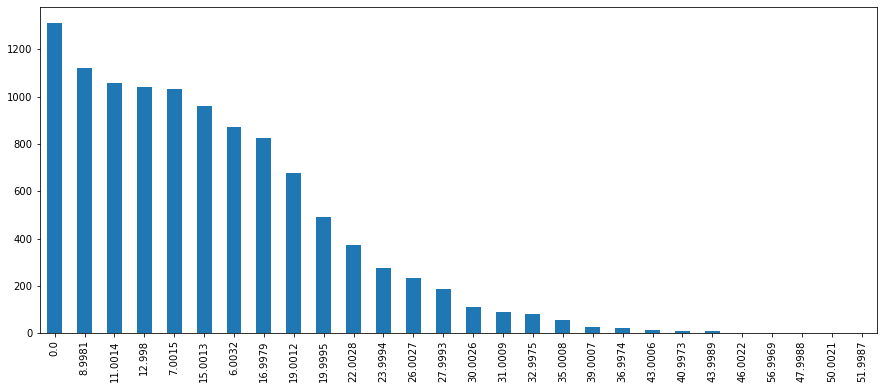

In [14]:
plt.figure(figsize=(15,6))
data['windspeed'].value_counts().plot.bar()

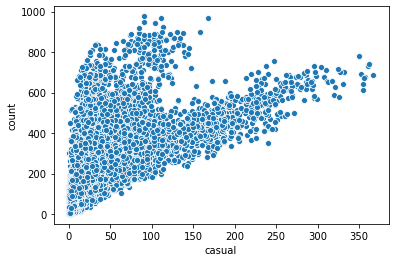

In [15]:
sns.scatterplot(x='casual',y='count',data=data)

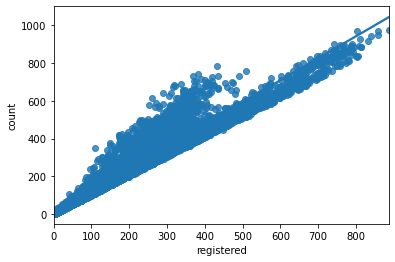

In [16]:
sns.regplot(x='registered',y='count',data=data)

In [17]:
df_1=data.rename(columns={'count':'Count'})

In [18]:
#pandas_profiling is a best visualization library to get deeper understanding the data i.e., data describe() method
from pandas_profiling import ProfileReport

In [19]:
prfile=ProfileReport(df_1,explorative=True)

In [20]:
#let's visualize it
prfile

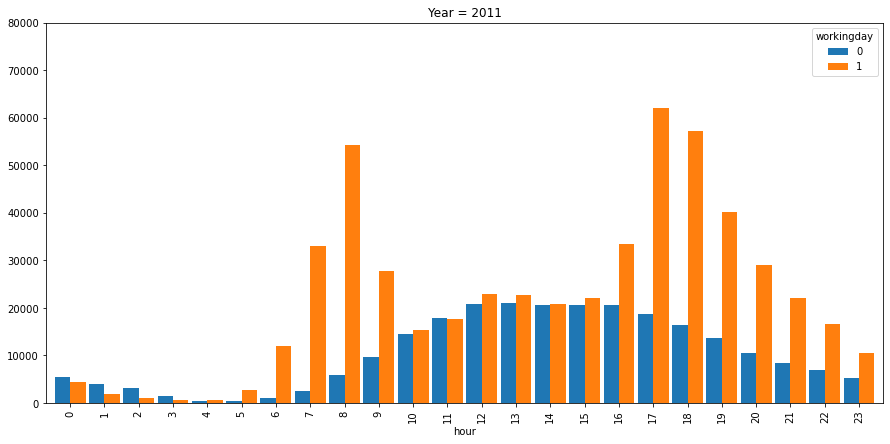

In [21]:
#method for creating count plot based on hour for a give year
def plot_data(data,year=None,agg='sum'):
    df=data.copy()
    if year: df=df[df.datetime.dt.year == year]
    df.loc[:,('hour')]=df.datetime.dt.hour #extracting the hour data if the year in the data as we passed as year argument in the function
    
    group_hour=df.groupby(['hour','workingday'])['count'].agg(agg).unstack()
    return group_hour.plot(kind='bar',ylim=(0,80000),figsize=(15,7),width=0.9,title="Year = {0}".format(year))

plot_data(data,year=2011)

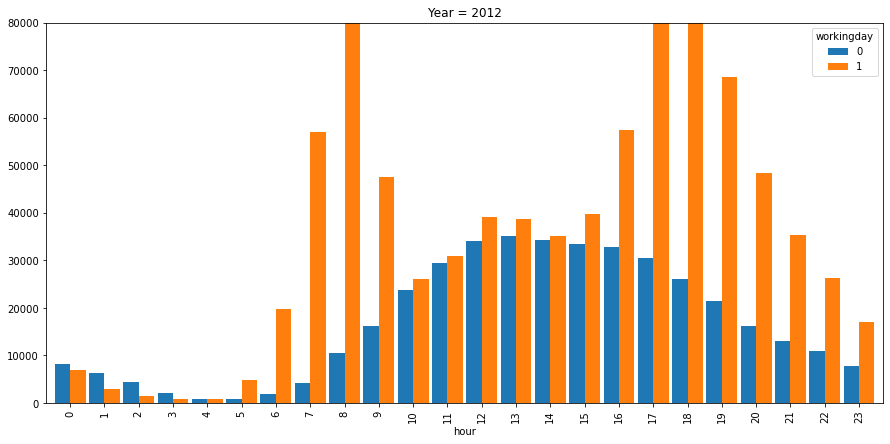

In [22]:
plot_data(data,year=2012)

In [23]:
data.head()

datetime  season  holiday  workingday  weather  temp   atemp  \
0 2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1 2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2 2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3 2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4 2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1

year    2011    2012
month               
1      23552   56332
2      32844   66269
3      38735   94766
4      50517  116885
5      79713  120434
6      89776  130957
7      92848  121769
8      83296  130220
9      79104  133425
10     79522  127912
11     70889  105551
12     61183   98977


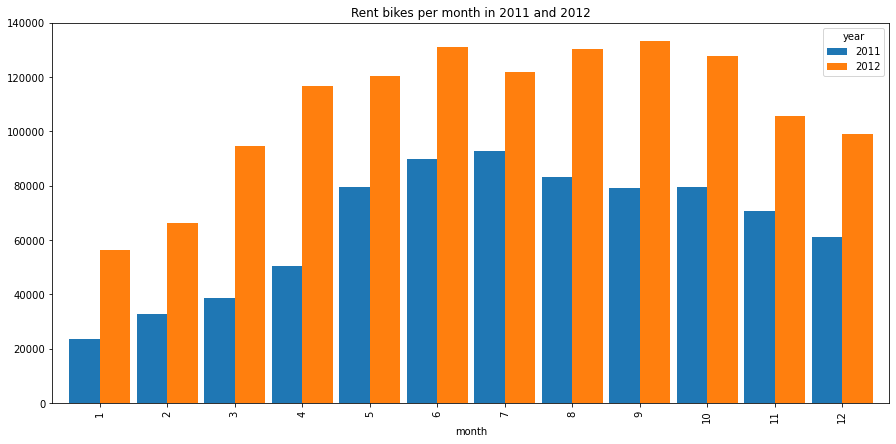

In [24]:
def plot_data_1(att_tr,title):
    df_1=data.copy()
    
    df_1['hour']=df_1.datetime.dt.hour
    df_1['month']=df_1.datetime.dt.month
    df_1['year']=df_1.datetime.dt.year
    
    df_groupby=df_1.groupby([att_tr,'year'])['count'].agg('sum').unstack()
    print(df_groupby)
    return df_groupby.plot(kind='bar',figsize=(15,7),width=0.9,title=title)

plot_data_1('month','Rent bikes per month in 2011 and 2012')

year   2011    2012
hour               
0      9889   15199
1      6064    9308
2      4267    5992
3      2122    2969
4      1130    1702
5      3252    5683
6     13057   21641
7     35664   61304
8     60149  104911
9     37339   63571
10    29934   49733
11    35543   60314
12    43819   73149
13    43774   73777
14    41607   69403
15    42796   73164
16    54015   90251
17    80679  133078
18    73426  123046
19    53812   89955
20    39518   64686
21    30579   48478
22    23674   37237
23    15870   24946


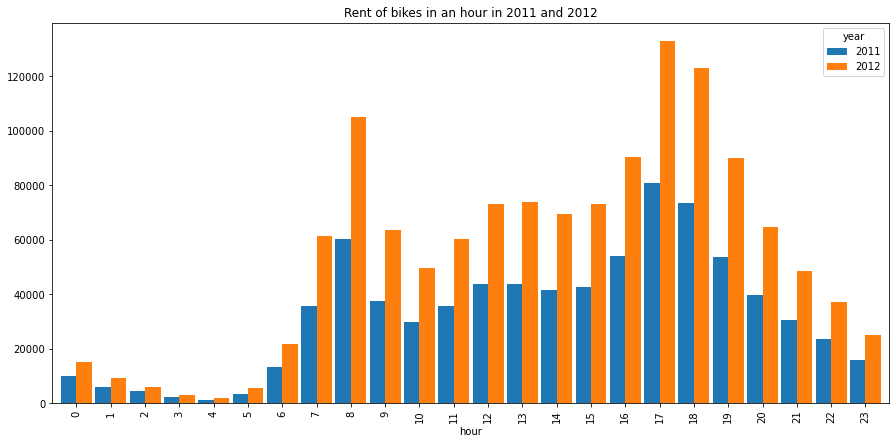

In [25]:
plot_data_1('hour','Rent of bikes in an hour in 2011 and 2012')

year      2011       2012
year                     
2011  781979.0        NaN
2012       NaN  1303497.0


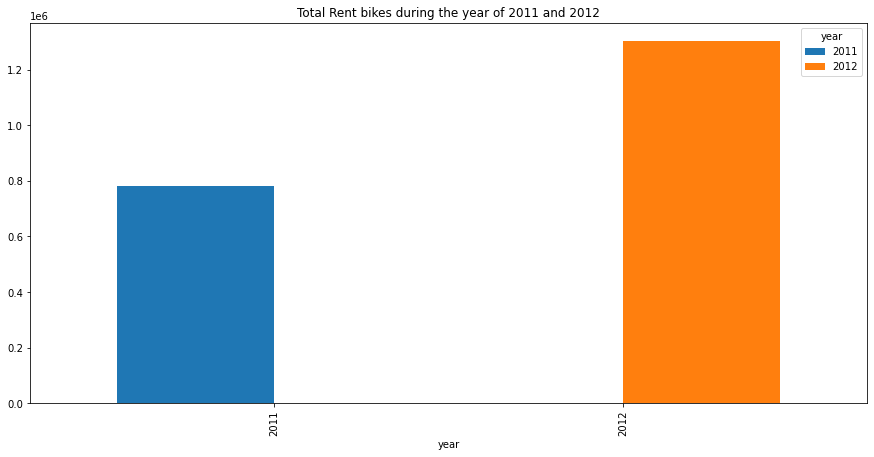

In [26]:
plot_data_1('year','Total Rent bikes during the year of 2011 and 2012')

In [46]:
def hour_plot(data,message= ''):
    df=data.copy()
    df['hour']=df.datetime.dt.hour #extracting the hour
    
    hours={}
    for hour in range(24):
        hours[hour]=df[df.hour == hour]['count'].values
        
    plt.figure(figsize=(15,7))
    plt.ylabel('Rents of bikes')
    plt.xlabel('Hours')
    plt.title('Rents of bikes in {0}'.format(message))
    plt.boxplot([hours[hour] for hour in range(24)])
    
    axis=plt.gca()
    axis.set_ylim([1,1100])

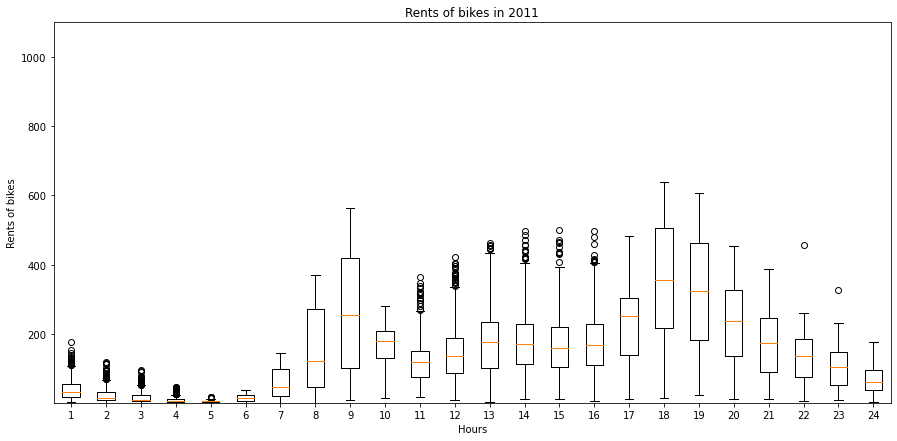

In [47]:
hour_plot(data[data.datetime.dt.year == 2011],'2011')

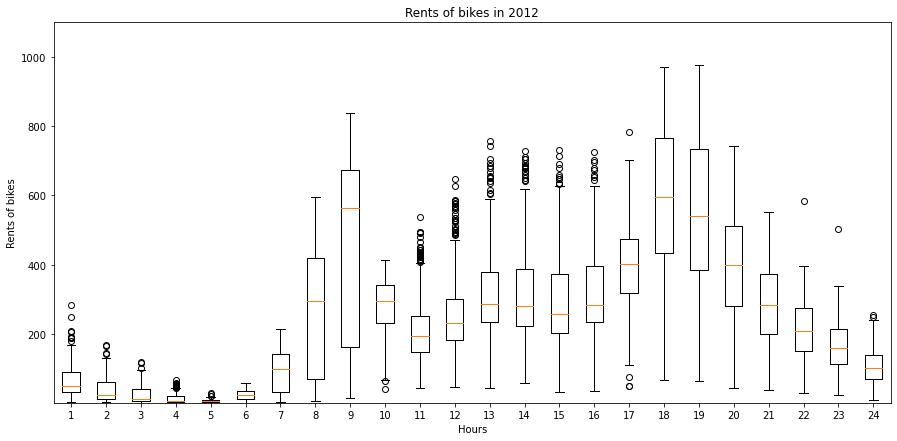

In [29]:
hour_plot(data[data.datetime.dt.year == 2012],'2012')

In [34]:
#Check the data type of the features
data.dtypes

datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
dtype: object

In [35]:
data['datetime']=pd.to_datetime(data['datetime']) #Converting the column in to datetime 
data['hour']=data['datetime'].dt.hour

In [36]:
data.head()

datetime  season  holiday  workingday  weather  temp   atemp  \
0 2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1 2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2 2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3 2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4 2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  hour  
0        81        0.0       3          13     16     0  
1        80        0.0       8          32     40     1  
2        80        0.0       5          27     32     2  
3        75        0.0       3          10     13     3  
4        75        0.0       0           1      1     4

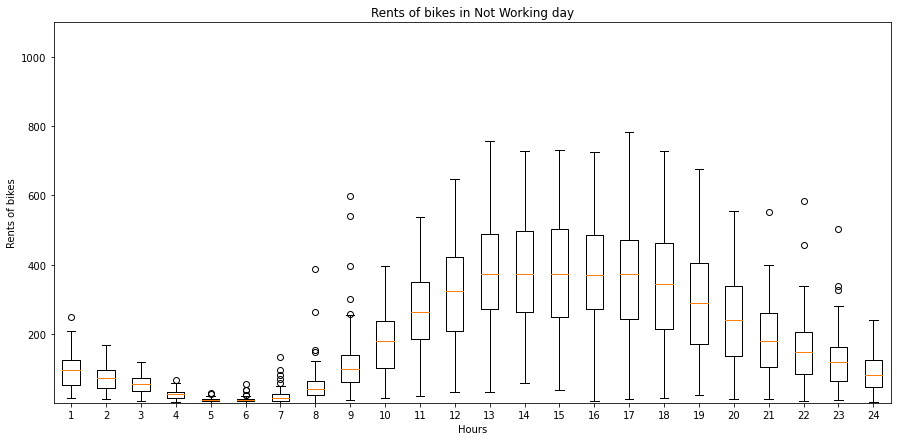

In [39]:
hour_plot(data[data.workingday == 0],'Not Working day')

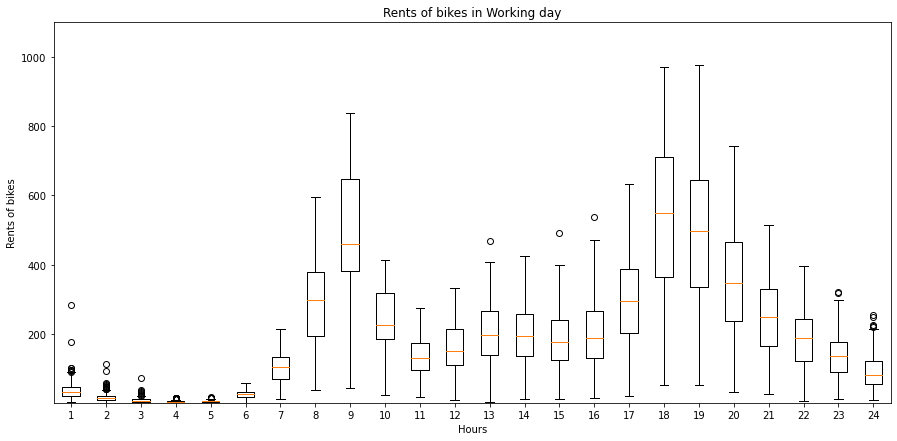

In [40]:
hour_plot(data[data.workingday == 1],'Working day')

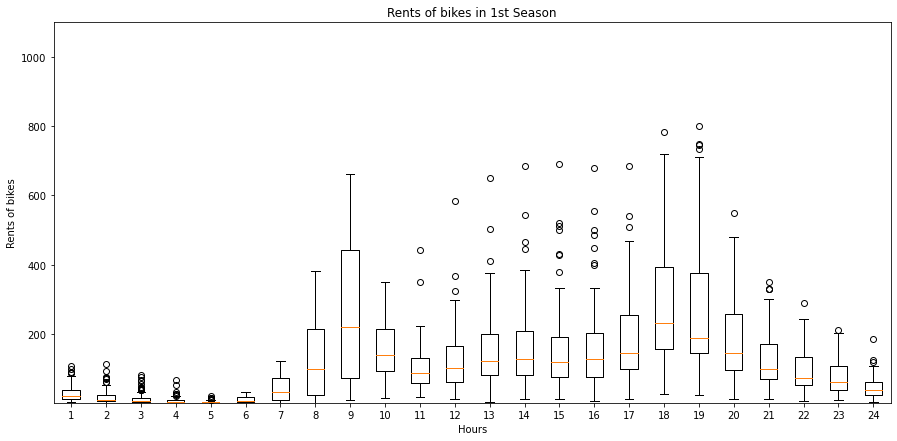

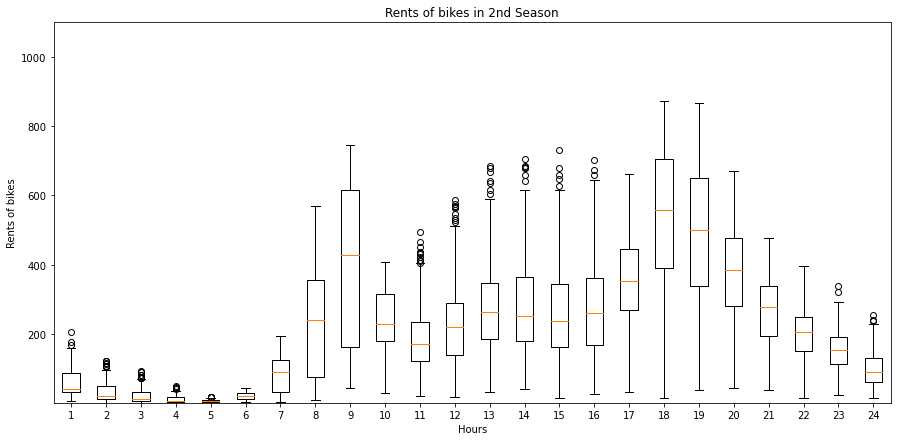

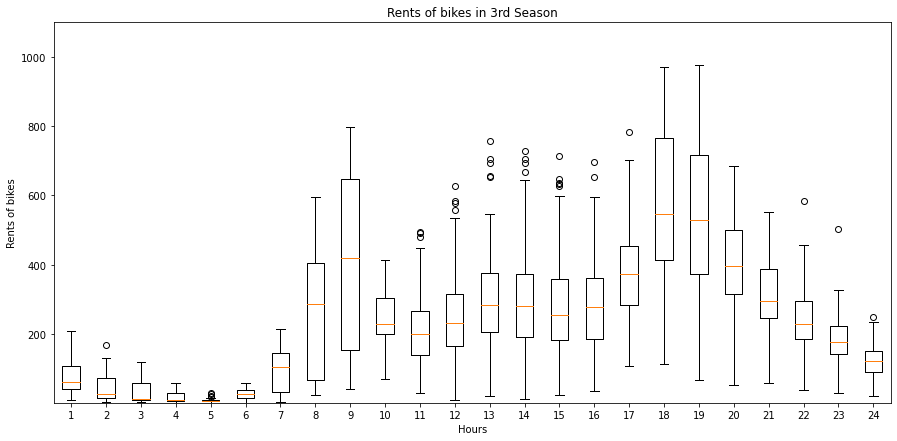

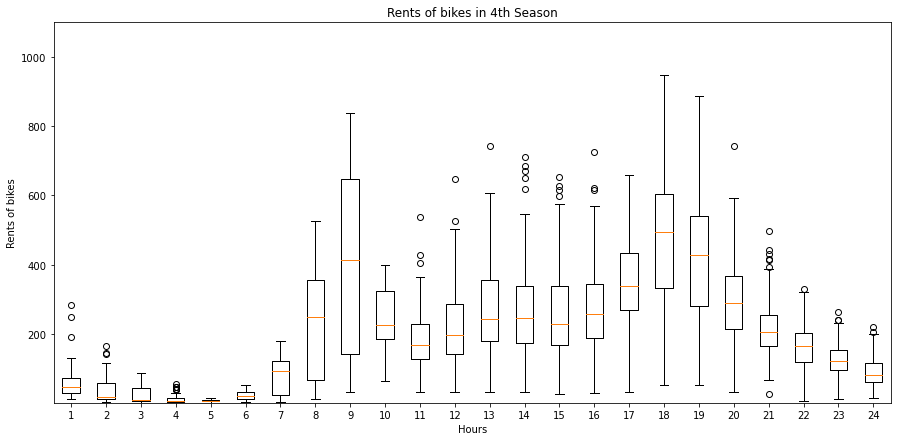

In [43]:
#Visualize the season rents based on an hour on each season
hour_plot(data[data.season == 1],'1st Season') #1st Season
hour_plot(data[data.season == 2],'2nd Season') #2nd Season
hour_plot(data[data.season == 3],'3rd Season') #3rd Season
hour_plot(data[data.season == 4],'4th Season') #4th Season

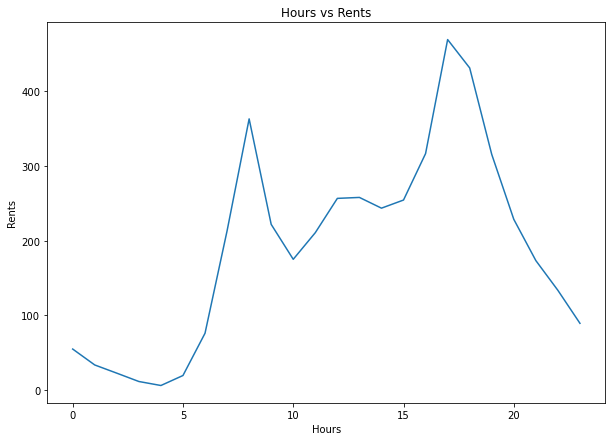

In [53]:
#Visualize the graph that represents Rents of a bike up and downs in 24 hours in a day
fig,axes=plt.subplots(figsize=(10,7))
hours=data.groupby(['hour'])['count'].agg('mean')
hours.plot(kind='line',ax=axes)
plt.title('Hours vs Rents')
axes.set_xlabel('Hours')
axes.set_ylabel('Rents')
plt.show()

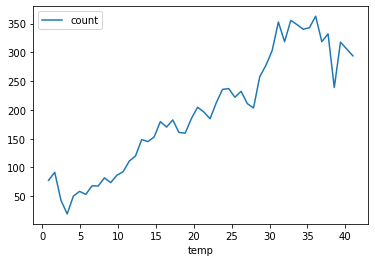

In [58]:
a=data.groupby('temp')[['count']].mean()
a.plot(kind='line')

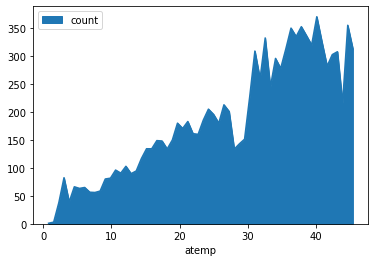

In [59]:
b=data.groupby('atemp')[['count']].mean()
b.plot(kind='area')